In [2]:
#!/usr/bin/env python
import io
import os
import glob
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df1 = pd.read_csv("/work/project/ext_016/RNA-Seq-Variant-Calling_1/source_dir/filtered/ds1_revel.csv")
df2 = pd.read_csv("/work/project/ext_016/RNA-Seq-Variant-Calling_1/source_dir_4/filtered/ds4_revel.csv")
df3 = pd.read_csv("/work/project/ext_016/RNA-Seq-Variant-Calling_1/source_dir_6/filtered/ds6_revel.csv")
dataset = pd.read_csv("Combined_ranking_final_table_unfiltered_the_FINAL.csv")
revel = pd.read_csv("revel_results/all_variants_with_revel.csv")

In [4]:
# merge revel scores and the combined table
# Ensure the position columns have the same data type
dataset['POS'] = dataset['POS'].astype(int)
revel['pos'] = revel['pos'].astype(int)

# Merge the datasets on position
# Left join to keep all rows from dataset
merged_dataset = dataset.merge(
    revel[['pos', 'REVEL']], 
    left_on='POS', 
    right_on='pos', 
    how='left'
)
# Drop the redundant pos column from revel if needed
merged_dataset = merged_dataset.drop('pos', axis=1, errors='ignore')
merged_dataset

,POS,Datasets,Healthy,SLE,Occurrence,REF,ALT,GQ,QUAL,DP,...,Protein_position,Amino_acids,CADD_PHRED,SIFT,PolyPhen,manual_ranking_score,ml_score,final_score,final_score_interpretation,REVEL
0,68003029,2,0,3,3,G,T,99.0,875.306667,65.0,...,129,L129I,26.000,0.02,0.951,85.855719,100.000000,92.927860,Very high risk,0.122
1,67999234,2,0,3,3,G,A,99.0,1490.640000,72.0,...,209,P209L,25.400,0.00,0.996,71.711330,100.000000,85.855665,Very high risk,0.194
2,67991568,2,0,1,1,C,T,99.0,968.640000,41.0,...,591,G591E,17.490,0.48,0.995,64.518414,100.000000,82.259207,High risk,0.029
3,67999680,2,0,1,1,C,A,50.0,42.640000,50.0,...,131,R131S,25.000,0.00,0.350,57.554599,100.000000,78.777300,High risk,0.217
4,67991757,3,0,1,1,C,T,99.0,0.000000,569.0,...,528,R528H,29.200,0.04,0.891,51.914286,100.000000,75.957143,High risk,0.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,67991207,3,1,0,1,C,G,99.0,0.000000,178.0,...,-,-,2.146,0.00,0.000,13.728571,0.335469,7.032020,Very low risk,NaN
659,67997644,3,1,0,1,C,A,99.0,0.000000,60.0,...,-,-,2.161,0.00,0.000,12.030874,1.733237,6.882056,Very low risk,NaN
660,67991322,3,1,0,1,C,G,99.0,0.000000,308.0,...,-,-,1.459,0.00,0.000,13.728571,0.000000,6.864286,Very low risk,NaN
661,67996064,3,1,0,1,G,T,99.0,0.000000,75.0,...,-,-,2.950,0.00,0.000,12.031408,0.013252,6.022330,Very low risk,NaN


Data shape after removing missing REVEL scores: (245, 30)

Expanded dataset summary:
Total data points: 336
SLE cases: 241
Healthy cases: 95

REVEL score statistics by disease state:
  Disease_State  count      mean  median       std    min    max
0       Healthy     95  0.262989   0.225  0.183787  0.013  0.753
1           SLE    241  0.256589   0.212  0.186218  0.009  0.936

Statistical comparison of REVEL scores between SLE and Healthy groups:
Mann-Whitney U test: U=11139.0, p-value=0.7008862669114293
Interpretation: No significant difference between groups


/tmp/ipykernel_45858/3634095490.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Disease_State', y='REVEL', data=expanded_df,
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will n

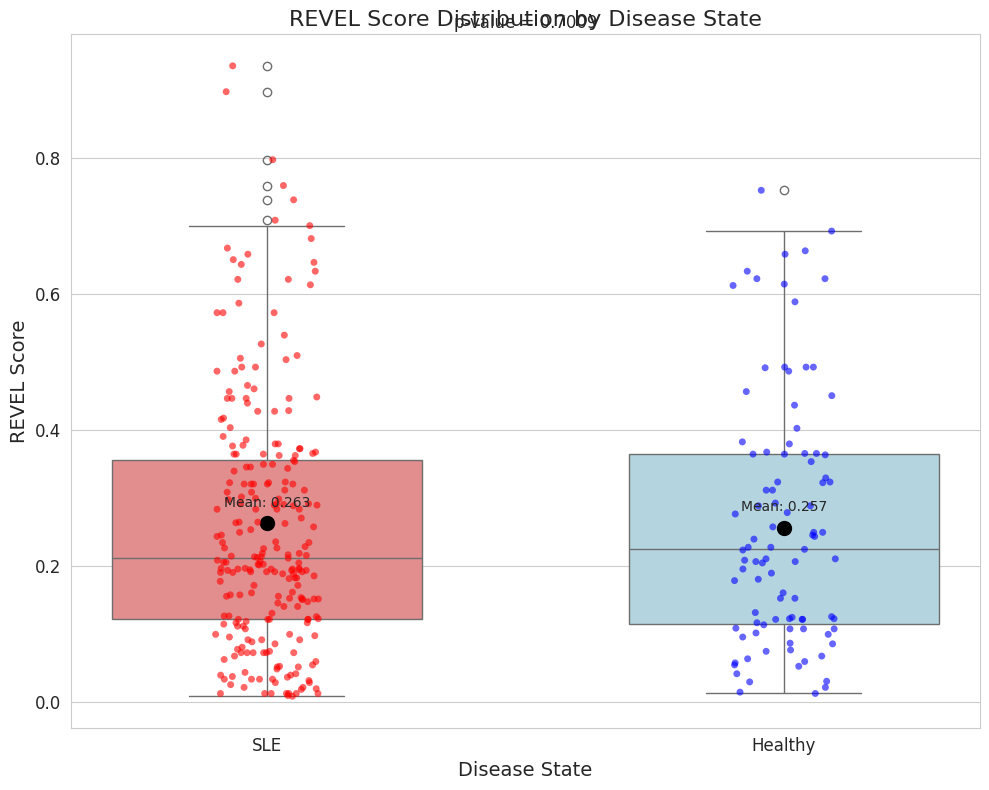

/tmp/ipykernel_45858/3634095490.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease_State', y='REVEL', data=expanded_df,
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need 

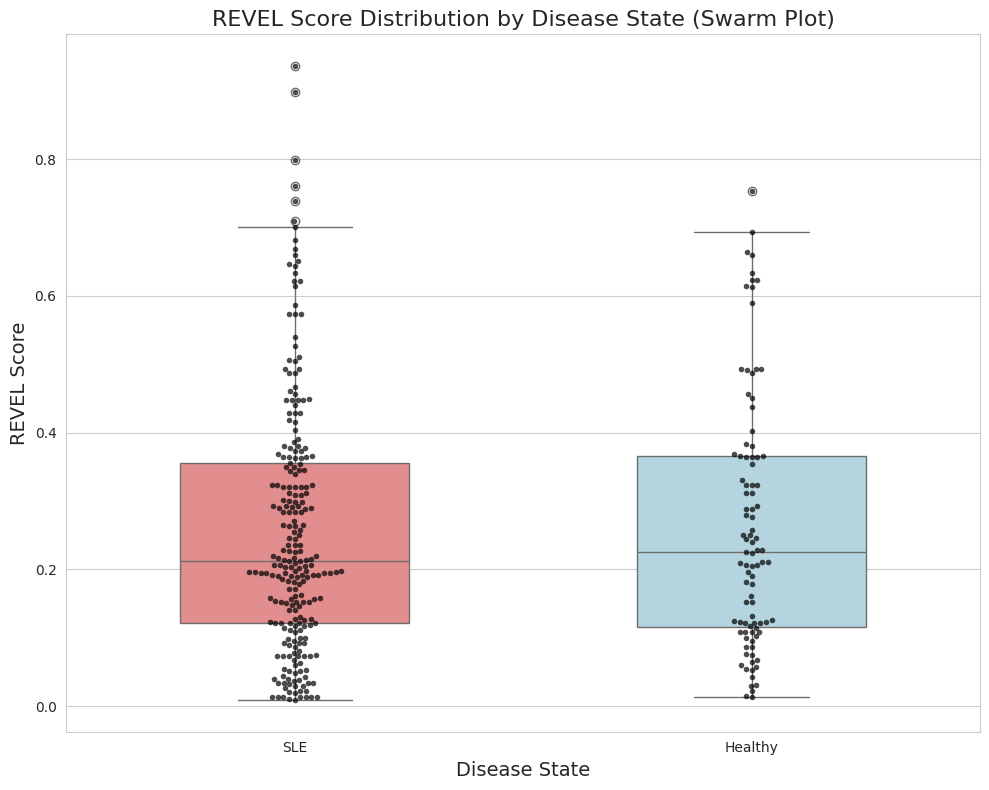

In [7]:

# Remove rows with missing REVEL scores
merged_dataset = merged_dataset.dropna(subset=['REVEL'])
print(f"Data shape after removing missing REVEL scores: {merged_dataset.shape}")

# Function to expand the dataset to create individual data points
def expand_data(dataframe):
    rows = []
    
    for _, row in dataframe.iterrows():
        # Create datapoints for SLE patients
        for _ in range(int(row['SLE'])):
            rows.append({
                'POS': row['POS'],
                'Disease_State': 'SLE',
                'REVEL': row['REVEL']
            })
        
        # Create datapoints for Healthy individuals
        for _ in range(int(row['Healthy'])):
            rows.append({
                'POS': row['POS'],
                'Disease_State': 'Healthy',
                'REVEL': row['REVEL']
            })
    
    return pd.DataFrame(rows)

# Expand the dataset
expanded_df = expand_data(merged_dataset)

# Print summary statistics
print("\nExpanded dataset summary:")
print(f"Total data points: {len(expanded_df)}")
print(f"SLE cases: {(expanded_df['Disease_State'] == 'SLE').sum()}")
print(f"Healthy cases: {(expanded_df['Disease_State'] == 'Healthy').sum()}")

# Calculate statistics by group
stats_by_group = expanded_df.groupby('Disease_State')['REVEL'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
print("\nREVEL score statistics by disease state:")
print(stats_by_group)

# Perform statistical tests to compare distributions
sle_scores = expanded_df[expanded_df['Disease_State'] == 'SLE']['REVEL']
healthy_scores = expanded_df[expanded_df['Disease_State'] == 'Healthy']['REVEL']
u_stat, p_value = stats.mannwhitneyu(sle_scores, healthy_scores, alternative='two-sided')

print("\nStatistical comparison of REVEL scores between SLE and Healthy groups:")
print(f"Mann-Whitney U test: U={u_stat}, p-value={p_value}")
print(f"Interpretation: {'Significant difference' if p_value < 0.05 else 'No significant difference'} between groups")

# Set the style for the plot
sns.set_style("whitegrid")

# Alternative visualization option: Use swarmplot instead of stripplot for non-overlapping points
plt.figure(figsize=(10, 8))

# Create boxplot
sns.boxplot(x='Disease_State', y='REVEL', data=expanded_df, 
            palette={'SLE': 'lightcoral', 'Healthy': 'lightblue'},
            width=0.5)

# Add swarm plot for non-overlapping points (better for smaller datasets)
# Comment this out if you have a large number of points as it can be slow
sns.swarmplot(x='Disease_State', y='REVEL', data=expanded_df,
              color='black', alpha=0.7, size=4)

plt.title('REVEL Score Distribution by Disease State (Swarm Plot)', fontsize=16)
plt.xlabel('Disease State', fontsize=14)
plt.ylabel('REVEL Score', fontsize=14)
plt.tight_layout()
#plt.savefig('revel_swarmplot.png', dpi=300, bbox_inches='tight')
plt.show()



Missing values:
REVEL: 0
CADD_PHRED: 0

REVEL expanded dataset summary:
Total data points: 336
SLE cases: 241
Healthy cases: 95

REVEL score statistics by disease state:
  Disease_State  count      mean  median       std    min    max
0       Healthy     95  0.262989   0.225  0.183787  0.013  0.753
1           SLE    241  0.256589   0.212  0.186218  0.009  0.936

Statistical comparison of REVEL scores between SLE and Healthy groups:
Mann-Whitney U test: U=11139.0, p-value=0.7008862669114293
Interpretation: No significant difference between groups


/tmp/ipykernel_45858/1494179487.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease_State', y='Score', data=expanded_df,
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need t


Visualization for REVEL saved as 'revel_boxplot_with_datapoints.png'

CADD_PHRED expanded dataset summary:
Total data points: 336
SLE cases: 241
Healthy cases: 95

CADD_PHRED score statistics by disease state:
  Disease_State  count       mean  median       std    min   max
0       Healthy     95  24.082316    24.7  5.751688  0.087  33.0
1           SLE    241  24.127627    25.2  6.010759  0.033  34.0

Statistical comparison of CADD_PHRED scores between SLE and Healthy groups:
Mann-Whitney U test: U=11724.0, p-value=0.7306356837479394
Interpretation: No significant difference between groups


/tmp/ipykernel_45858/1494179487.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease_State', y='Score', data=expanded_df,
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need t


Visualization for CADD_PHRED saved as 'cadd_phred_boxplot_with_datapoints.png'


/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you

<Figure size 1600x800 with 0 Axes>

/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


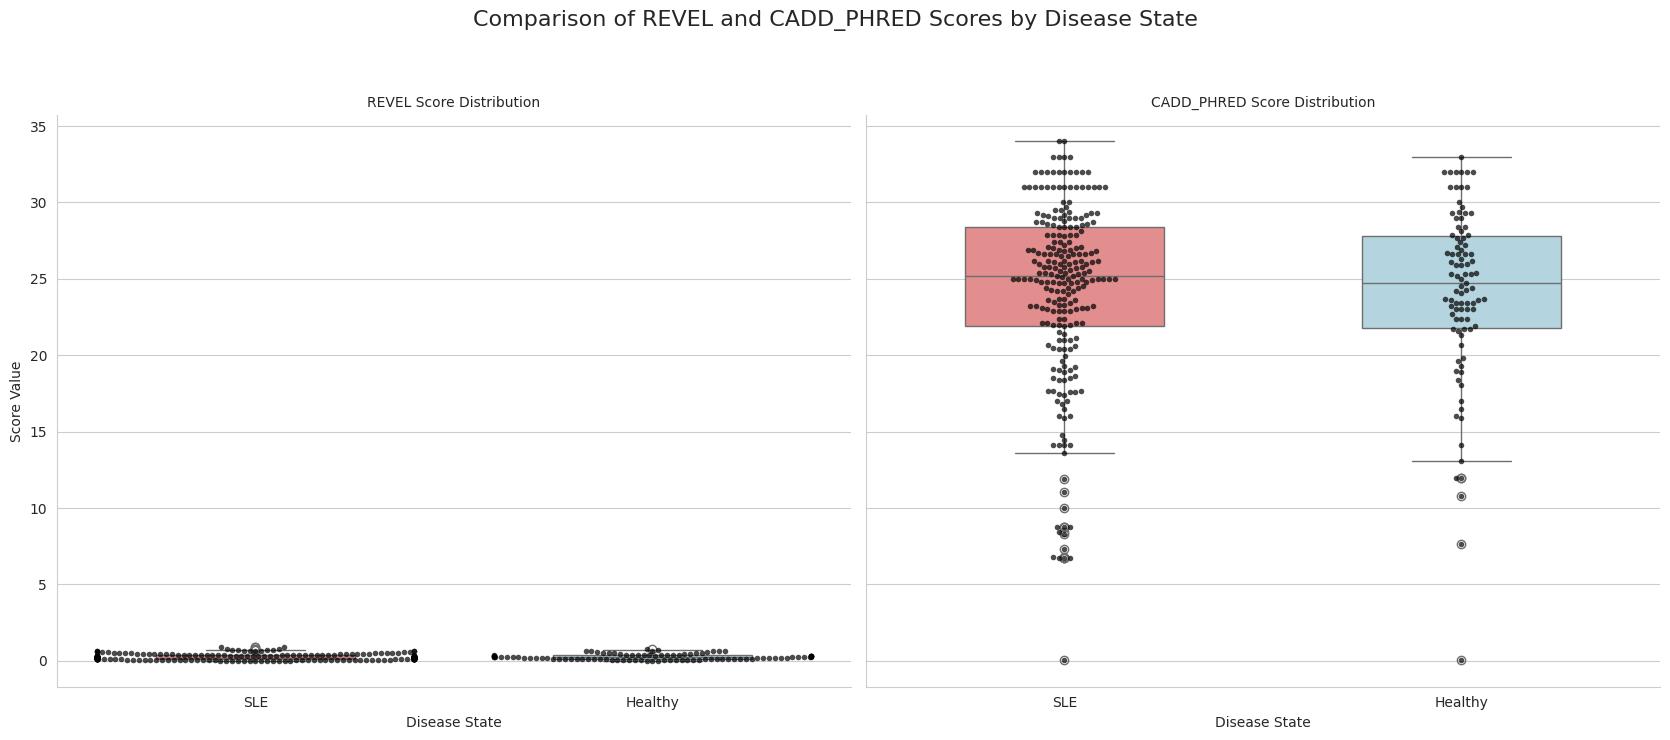

/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you

<Figure size 1600x800 with 0 Axes>

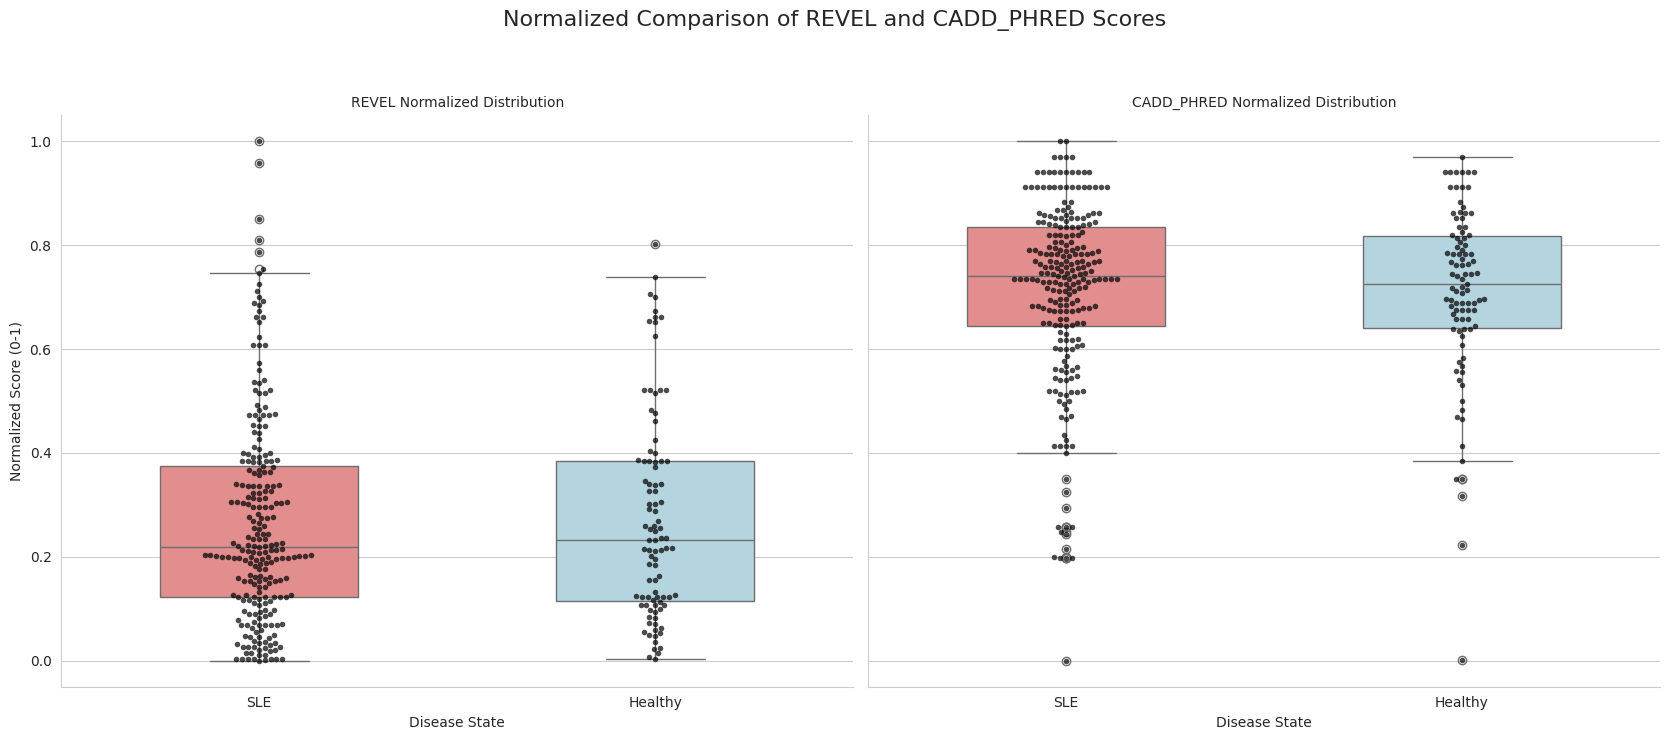


Analysis complete!


In [8]:

# Check for missing values in both REVEL and CADD_PHRED
print("Missing values:")
print(f"REVEL: {merged_dataset['REVEL'].isna().sum()}")
print(f"CADD_PHRED: {merged_dataset['CADD_PHRED'].isna().sum() if 'CADD_PHRED' in merged_dataset.columns else 'Column not found'}")

# If CADD_PHRED column doesn't exist, we need to handle this
if 'CADD_PHRED' not in merged_dataset.columns:
    print("CADD_PHRED column not found in the dataset. Please check the column name.")
    # For demonstration, let's continue by assuming we have the column
    print("Continuing with the assumption that the column exists...")

# Function to expand the dataset to create individual data points
def expand_data(dataframe, score_column):
    rows = []
    
    for _, row in dataframe.iterrows():
        # Skip rows with missing score values
        if pd.isna(row[score_column]):
            continue
            
        # Create datapoints for SLE patients
        for _ in range(int(row['SLE'])):
            rows.append({
                'POS': row['POS'],
                'Disease_State': 'SLE',
                'Score': row[score_column],
                'Score_Type': score_column
            })
        
        # Create datapoints for Healthy individuals
        for _ in range(int(row['Healthy'])):
            rows.append({
                'POS': row['POS'],
                'Disease_State': 'Healthy',
                'Score': row[score_column],
                'Score_Type': score_column
            })
    
    return pd.DataFrame(rows)

# Create a function to generate the plot
def create_score_plot(score_name, expanded_df):
    # Calculate statistics by group
    stats_by_group = expanded_df.groupby('Disease_State')['Score'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
    print(f"\n{score_name} score statistics by disease state:")
    print(stats_by_group)
    
    # Perform statistical tests to compare distributions
    sle_scores = expanded_df[expanded_df['Disease_State'] == 'SLE']['Score']
    healthy_scores = expanded_df[expanded_df['Disease_State'] == 'Healthy']['Score']
    
    if len(sle_scores) > 0 and len(healthy_scores) > 0:  # Ensure we have data in both groups
        u_stat, p_value = stats.mannwhitneyu(sle_scores, healthy_scores, alternative='two-sided')
        
        print(f"\nStatistical comparison of {score_name} scores between SLE and Healthy groups:")
        print(f"Mann-Whitney U test: U={u_stat}, p-value={p_value}")
        print(f"Interpretation: {'Significant difference' if p_value < 0.05 else 'No significant difference'} between groups")
    else:
        print(f"\nCannot perform statistical test for {score_name} due to insufficient data in one or both groups.")
        p_value = None
    
    # Set the style for the plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 8))
    
    # Create boxplot
    sns.boxplot(x='Disease_State', y='Score', data=expanded_df, 
                palette={'SLE': 'lightcoral', 'Healthy': 'lightblue'},
                width=0.5)
    
    # Add swarm plot for non-overlapping points
    sns.swarmplot(x='Disease_State', y='Score', data=expanded_df,
                  color='black', alpha=0.7, size=4)
    
    # Add labels and title
    plt.title(f'{score_name} Score Distribution by Disease State', fontsize=16)
    plt.xlabel('Disease State', fontsize=14)
    plt.ylabel(f'{score_name} Score', fontsize=14)
    
    # Add p-value annotation if available
    if p_value is not None:
        y_max = expanded_df['Score'].max()
        plt.text(0.5, y_max + 0.05 * y_max, f"p-value = {p_value:.4f}", 
                 ha='center', va='bottom', fontsize=12)
    
    # Add mean markers
    means = expanded_df.groupby('Disease_State')['Score'].mean()
    for i, disease in enumerate(['Healthy', 'SLE']):
        if disease in means.index:
            plt.plot(i, means[disease], 'o', color='darkgreen', markersize=10)
            plt.text(i, means[disease]+0.02*expanded_df['Score'].max(), f"Mean: {means[disease]:.3f}", 
                    ha='center', va='bottom', fontsize=10)
    
    # Enhance the plot appearance
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f'{score_name.lower()}_boxplot_with_datapoints.png', dpi=300, bbox_inches='tight')
    
    print(f"\nVisualization for {score_name} saved as '{score_name.lower()}_boxplot_with_datapoints.png'")
    
    return plt

# Process REVEL scores
revel_data = merged_dataset.dropna(subset=['REVEL'])
revel_expanded = expand_data(revel_data, 'REVEL')
print("\nREVEL expanded dataset summary:")
print(f"Total data points: {len(revel_expanded)}")
print(f"SLE cases: {(revel_expanded['Disease_State'] == 'SLE').sum()}")
print(f"Healthy cases: {(revel_expanded['Disease_State'] == 'Healthy').sum()}")

# Generate REVEL plot
revel_plot = create_score_plot('REVEL', revel_expanded)
revel_plot.close()

# Process CADD_PHRED scores if the column exists
if 'CADD_PHRED' in merged_dataset.columns:
    cadd_data = merged_dataset.dropna(subset=['CADD_PHRED'])
    cadd_expanded = expand_data(cadd_data, 'CADD_PHRED')
    print("\nCADD_PHRED expanded dataset summary:")
    print(f"Total data points: {len(cadd_expanded)}")
    print(f"SLE cases: {(cadd_expanded['Disease_State'] == 'SLE').sum()}")
    print(f"Healthy cases: {(cadd_expanded['Disease_State'] == 'Healthy').sum()}")
    
    # Generate CADD_PHRED plot
    cadd_plot = create_score_plot('CADD_PHRED', cadd_expanded)
    cadd_plot.close()
else:
    print("\nCannot generate CADD_PHRED plot as the column is not present in the dataset.")

# Create a combined plot for comparison
if 'CADD_PHRED' in merged_dataset.columns:
    # Create a new dataframe with both scores
    revel_expanded['Score_Type'] = 'REVEL'
    cadd_expanded['Score_Type'] = 'CADD_PHRED'
    
    # Normalize scores for comparison (optional)
    from sklearn.preprocessing import MinMaxScaler
    
    # Function to normalize scores within each score type
    def normalize_scores(df):
        for score_type in df['Score_Type'].unique():
            mask = df['Score_Type'] == score_type
            min_val = df.loc[mask, 'Score'].min()
            max_val = df.loc[mask, 'Score'].max()
            
            # Min-max normalization
            if max_val > min_val:  # Avoid division by zero
                df.loc[mask, 'Normalized_Score'] = (df.loc[mask, 'Score'] - min_val) / (max_val - min_val)
            else:
                df.loc[mask, 'Normalized_Score'] = 0.5  # Default value if all scores are the same
        
        return df
    
    # Combine the datasets
    combined_data = pd.concat([revel_expanded, cadd_expanded])
    
    # Add normalized scores
    combined_data = normalize_scores(combined_data)
    
    # Create a facet grid for comparing REVEL and CADD_PHRED side by side
    plt.figure(figsize=(16, 8))
    g = sns.FacetGrid(combined_data, col='Score_Type', height=7, aspect=1.2)
    g.map_dataframe(sns.boxplot, x='Disease_State', y='Score', palette={'SLE': 'lightcoral', 'Healthy': 'lightblue'}, width=0.5)
    g.map_dataframe(sns.swarmplot, x='Disease_State', y='Score', color='black', alpha=0.7, size=4)
    
    # Add titles and labels
    g.set_axis_labels("Disease State", "Score Value")
    g.set_titles(col_template="{col_name} Score Distribution")
    
    # Add overall title
    plt.suptitle('Comparison of REVEL and CADD_PHRED Scores by Disease State', fontsize=16, y=1.05)
    
    plt.tight_layout()
    #plt.savefig('combined_score_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    # Create a normalized version for direct comparison
    plt.figure(figsize=(16, 8))
    g = sns.FacetGrid(combined_data, col='Score_Type', height=7, aspect=1.2)
    g.map_dataframe(sns.boxplot, x='Disease_State', y='Normalized_Score', palette={'SLE': 'lightcoral', 'Healthy': 'lightblue'}, width=0.5)
    g.map_dataframe(sns.swarmplot, x='Disease_State', y='Normalized_Score', color='black', alpha=0.7, size=4)
    
    g.set_axis_labels("Disease State", "Normalized Score (0-1)")
    g.set_titles(col_template="{col_name} Normalized Distribution")
    
    plt.suptitle('Normalized Comparison of REVEL and CADD_PHRED Scores', fontsize=16, y=1.05)
    
    plt.tight_layout()
    #plt.savefig('normalized_score_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()    
    


print("\nAnalysis complete!")

CADD_PHRED missing values: 0 out of 245
Data shape after removing missing CADD_PHRED scores: (245, 30)

Expanded dataset summary:
Total data points: 336
SLE cases: 241
Healthy cases: 95

CADD_PHRED score statistics by disease state:
  Disease_State  count       mean  median       std    min   max
0       Healthy     95  24.082316    24.7  5.751688  0.087  33.0
1           SLE    241  24.127627    25.2  6.010759  0.033  34.0

Statistical comparison of CADD_PHRED scores between SLE and Healthy groups:
Mann-Whitney U test: U=11724.0, p-value=0.7306356837479394
Interpretation: No significant difference between groups


/tmp/ipykernel_45858/870010758.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Disease_State', y='CADD_PHRED', data=expanded_df,
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you wi

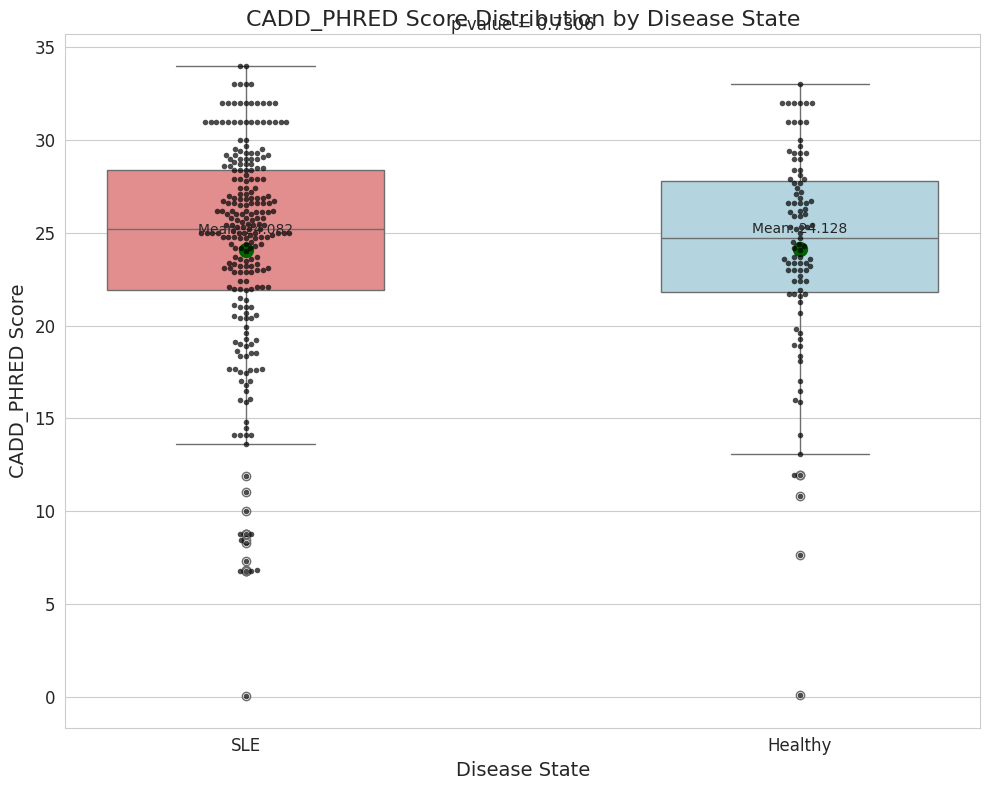


Analysis complete. Visualization file saved as 'cadd_phred_distribution.png'


In [9]:

# Check if CADD_PHRED column exists in the dataset
if 'CADD_PHRED' not in merged_dataset.columns:
    print("CADD_PHRED column not found in the dataset. Please check the column name.")
    # List available columns to help identify the correct column name
    print("Available columns:", merged_dataset.columns.tolist())
else:
    # Check for missing values in CADD_PHRED column
    print(f"CADD_PHRED missing values: {merged_dataset['CADD_PHRED'].isna().sum()} out of {len(merged_dataset)}")
    
    # Remove rows with missing CADD_PHRED scores
    merged_dataset = merged_dataset.dropna(subset=['CADD_PHRED'])
    print(f"Data shape after removing missing CADD_PHRED scores: {merged_dataset.shape}")
    
    # Function to expand the dataset to create individual data points
    def expand_data(dataframe):
        rows = []
        
        for _, row in dataframe.iterrows():
            # Create datapoints for SLE patients
            for _ in range(int(row['SLE'])):
                rows.append({
                    'POS': row['POS'],
                    'Disease_State': 'SLE',
                    'CADD_PHRED': row['CADD_PHRED']
                })
            
            # Create datapoints for Healthy individuals
            for _ in range(int(row['Healthy'])):
                rows.append({
                    'POS': row['POS'],
                    'Disease_State': 'Healthy',
                    'CADD_PHRED': row['CADD_PHRED']
                })
        
        return pd.DataFrame(rows)
    
    # Expand the dataset
    expanded_df = expand_data(merged_dataset)
    
    # Print summary statistics
    print("\nExpanded dataset summary:")
    print(f"Total data points: {len(expanded_df)}")
    print(f"SLE cases: {(expanded_df['Disease_State'] == 'SLE').sum()}")
    print(f"Healthy cases: {(expanded_df['Disease_State'] == 'Healthy').sum()}")
    
    # Calculate statistics by group
    stats_by_group = expanded_df.groupby('Disease_State')['CADD_PHRED'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
    print("\nCADD_PHRED score statistics by disease state:")
    print(stats_by_group)
    
    # Perform statistical tests to compare distributions
    sle_scores = expanded_df[expanded_df['Disease_State'] == 'SLE']['CADD_PHRED']
    healthy_scores = expanded_df[expanded_df['Disease_State'] == 'Healthy']['CADD_PHRED']
    
    # Mann-Whitney U test (non-parametric test for comparing distributions)
    u_stat, p_value = stats.mannwhitneyu(sle_scores, healthy_scores, alternative='two-sided')
    
    print("\nStatistical comparison of CADD_PHRED scores between SLE and Healthy groups:")
    print(f"Mann-Whitney U test: U={u_stat}, p-value={p_value}")
    print(f"Interpretation: {'Significant difference' if p_value < 0.05 else 'No significant difference'} between groups")
    
    # Set the style for the plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 8))
    
    # Create boxplot
    ax = sns.boxplot(x='Disease_State', y='CADD_PHRED', data=expanded_df,
                palette={'SLE': 'lightcoral', 'Healthy': 'lightblue'},
                width=0.5)
    
    # Add swarm plot for non-overlapping points
    sns.swarmplot(x='Disease_State', y='CADD_PHRED', data=expanded_df,
                  color='black', alpha=0.7, size=4)
    
    # Add labels and title
    plt.title('CADD_PHRED Score Distribution by Disease State', fontsize=16)
    plt.xlabel('Disease State', fontsize=14)
    plt.ylabel('CADD_PHRED Score', fontsize=14)
    
    # Add p-value annotation
    y_max = expanded_df['CADD_PHRED'].max()
    plt.text(0.5, y_max + 0.05 * (y_max - expanded_df['CADD_PHRED'].min()), 
             f"p-value = {p_value:.4f}", 
             ha='center', va='bottom', fontsize=12)
    
    # Add mean markers
    means = expanded_df.groupby('Disease_State')['CADD_PHRED'].mean()
    for i, disease in enumerate(['Healthy', 'SLE']):
        if disease in means.index:
            plt.plot(i, means[disease], 'o', color='darkgreen', markersize=10)
            plt.text(i, means[disease] + 0.02 * y_max, f"Mean: {means[disease]:.3f}", 
                    ha='center', va='bottom', fontsize=10)
    
    # Enhance the plot appearance
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # Save the figure
    #plt.savefig('cadd_phred_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nAnalysis complete. Visualization file saved as 'cadd_phred_distribution.png'")

In [18]:
final_df = pd.concat([df1, df2, df3], ignore_index=True)
final_df

,Run,unc_mut,Disease,Dataset,coverage,mutation_rate
0,SRR6870351,0,Healthy,1,2744,0.000000
1,SRR6870375,0,Healthy,1,3726,0.000000
2,SRR6870318,0,SLE,1,3032,0.000000
3,SRR6870364,0,Healthy,1,2758,0.000000
4,SRR6870297,0,SLE,1,4325,0.000000
...,...,...,...,...,...,...
255,SRR8181371,1,systemic lupus erythematosus,3,11152,0.008967
256,SRR8181380,1,healthy,3,7651,0.013070
257,SRR8181370,1,systemic lupus erythematosus,3,9579,0.010440
258,SRR8181376,2,systemic lupus erythematosus,3,7233,0.027651


In [20]:
# Convert all values to lowercase first for case-insensitive comparison
final_df['Disease'] = final_df['Disease'].str.lower()

# Replace variations of SLE with "SLE"
final_df['Disease'] = final_df['Disease'].replace({
    'systemic lupus erythematosus (sle)': 'sle',
    'systemic lupus erythematous': 'sle',
    'systemic lupus erythematosus': 'sle'
})

# Now capitalize appropriately
final_df['Disease'] = final_df['Disease'].replace({
    'sle': 'SLE',
    'healthy': 'Healthy'
})

/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a

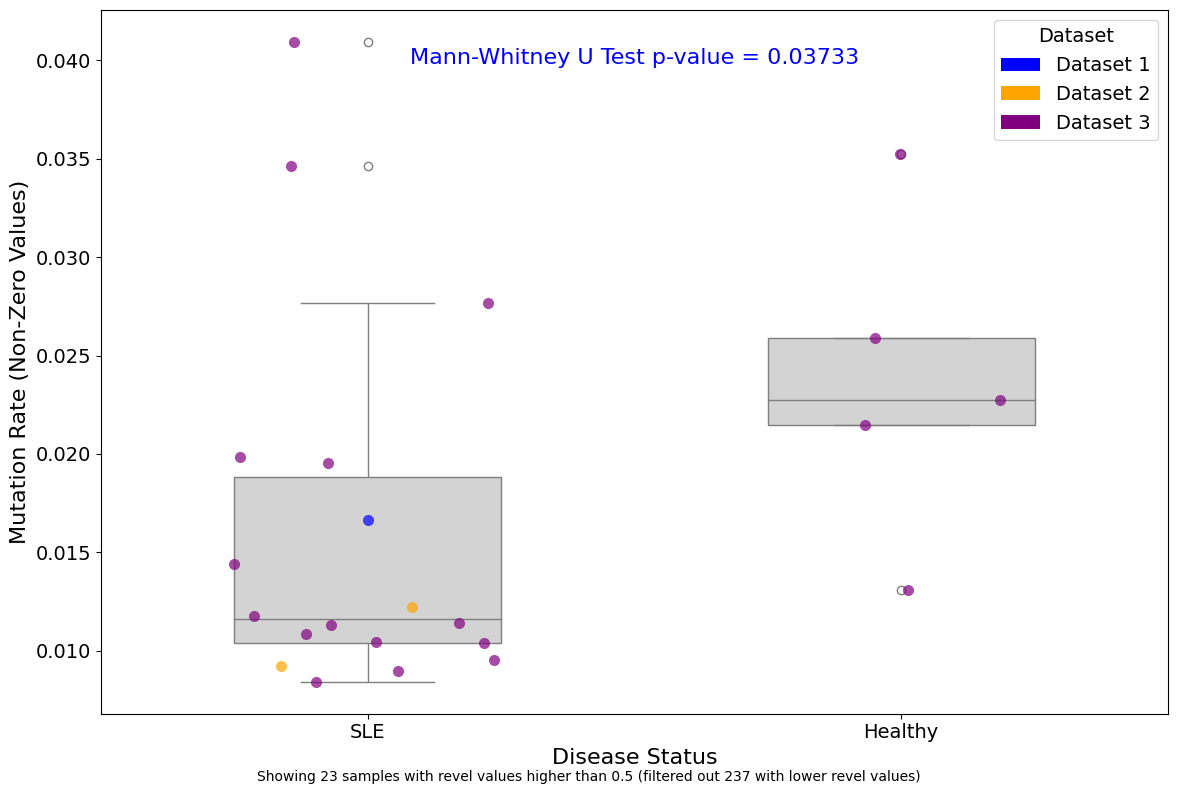

In [26]:


# Filter DataFrame to include only non-zero mutation_rate values
nonzero_df = final_df[final_df['mutation_rate'] > 0]

# Check if we have enough data to plot
if len(nonzero_df) == 0:
    print("No non-zero mutation rates found in the dataset.")
else:
    # Increase default font sizes
    plt.rcParams.update({
        'font.size': 14,  # Base font size increase
        'axes.labelsize': 16,  # Axis labels
        'axes.titlesize': 18,  # Subplot title
        'xtick.labelsize': 14,  # X tick labels
        'ytick.labelsize': 14,  # Y tick labels
        'legend.fontsize': 14,  # Legend text
        'figure.titlesize': 20  # Figure title
    })

    # Create figure
    plt.figure(figsize=(12, 8))

    # Calculate p-value for Mann-Whitney U test between the two groups
    healthy_rates = nonzero_df[nonzero_df['Disease'] == 'Healthy']['mutation_rate']
    sle_rates = nonzero_df[nonzero_df['Disease'] == 'SLE']['mutation_rate']
    
    # Only perform the test if we have data for both groups
    if len(healthy_rates) > 0 and len(sle_rates) > 0:
        u_stat, p_value = stats.mannwhitneyu(healthy_rates, sle_rates, alternative='two-sided')
        p_value_valid = True
    else:
        p_value = np.nan
        p_value_valid = False

    # Create boxplot - no hue for disease here since we'll color by dataset
    ax = sns.boxplot(
        data=nonzero_df, 
        x='Disease', 
        y='mutation_rate',
        color='lightgray',
        width=0.5,
        legend=False
    )

    # Create a color palette for datasets
    dataset_colors = {1: 'blue', 2: 'orange', 3: 'purple'}
    
    # Create legend handles manually
    legend_handles = []
    
    # Overlay individual sample points colored by dataset
    for ds in sorted(nonzero_df['Dataset'].unique()):
        subset = nonzero_df[nonzero_df['Dataset'] == ds]
        sns.stripplot(
            data=subset, 
            x='Disease', 
            y='mutation_rate', 
            color=dataset_colors[ds], 
            label=None,  # Don't create automatic legend entries
            size=8,
            jitter=0.3, 
            alpha=0.7, 
            ax=ax
        )
        # Create manual legend handle for this dataset
        legend_handles.append(Patch(facecolor=dataset_colors[ds], 
                                   label=f'Dataset {ds}'))

    # Add p-value annotation if valid
    if p_value_valid:
        y_max = nonzero_df['mutation_rate'].max()
        plt.text(0.5, y_max * 0.98, 
                f"Mann-Whitney U Test p-value = {p_value:.4g}", 
                ha='center', 
                va='center', 
                fontsize=16, 
                color='blue')

    # Customize the plot
    plt.xlabel('Disease Status')
    plt.ylabel('Mutation Rate (Non-Zero Values)')
    
    # Create legend for datasets using our custom handles
    plt.legend(handles=legend_handles, title='Dataset', loc='upper right')

    plt.xticks(rotation=0)
    plt.tight_layout()

    # Display count of samples shown and filtered
    total_samples = len(final_df)
    shown_samples = len(nonzero_df)
    filtered_samples = total_samples - shown_samples
    plt.figtext(0.5, 0.01, 
                f"Showing {shown_samples} samples with revel values higher than 0.5 (filtered out {filtered_samples} with lower revel values)", 
                ha='center', fontsize=10)

    plt.savefig('revel_rate.png', 
            dpi=300, bbox_inches='tight')
    plt.show()

/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gdurmaz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.

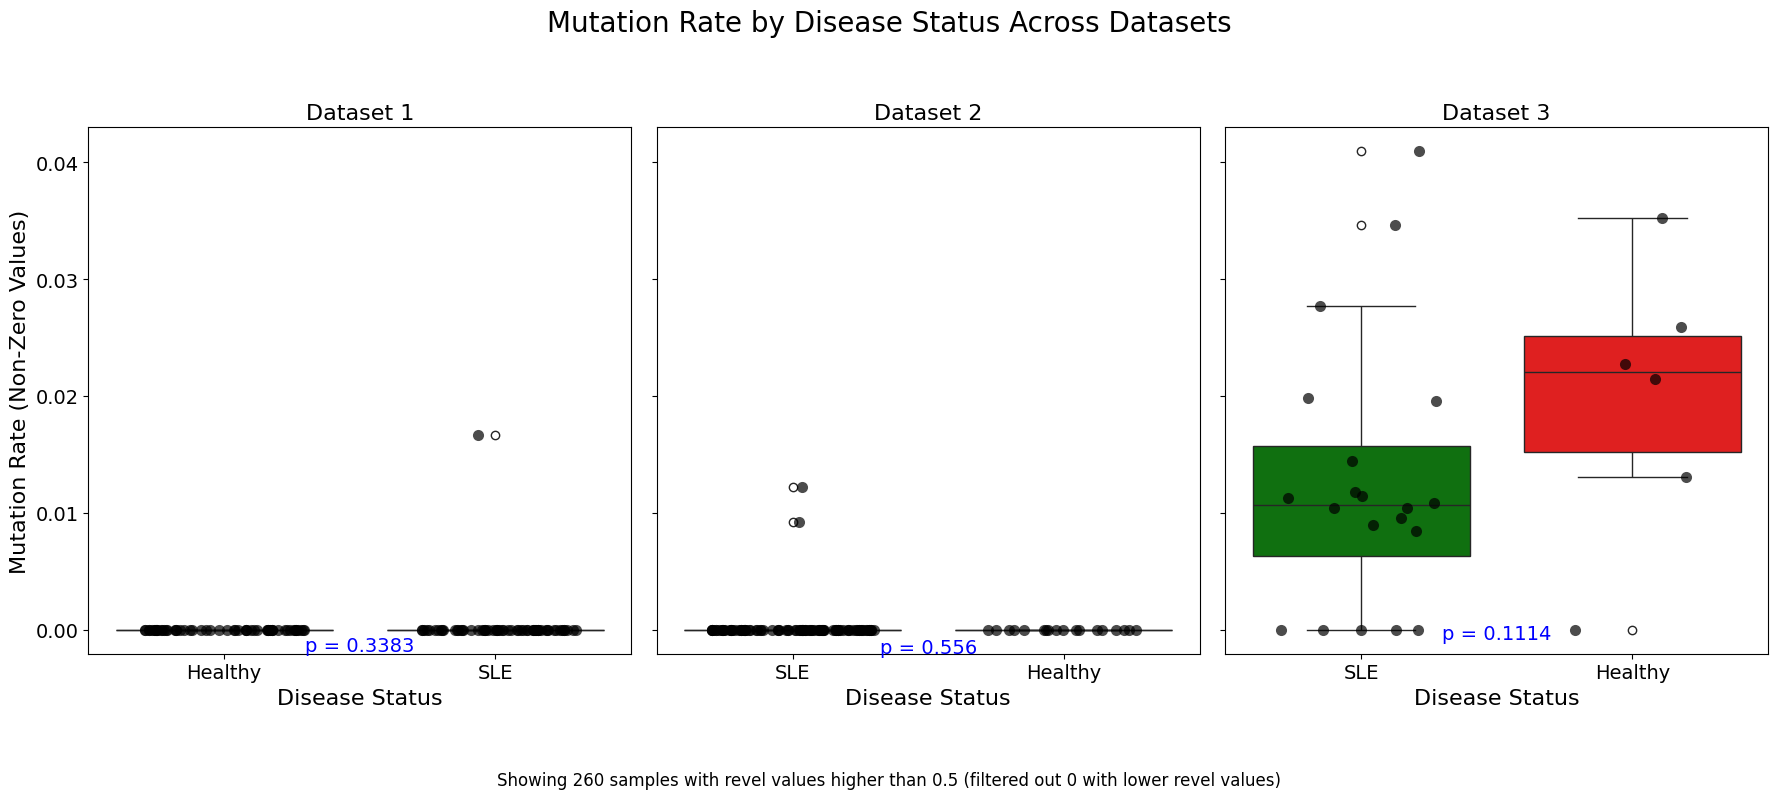

In [30]:


# Filter DataFrame to include only non-zero mutation_rate values
nonzero_df = final_df.copy()

# Check if we have enough data to plot
if len(nonzero_df) == 0:
    print("No non-zero mutation rates found in the dataset.")
else:
    # Increase default font sizes
    plt.rcParams.update({
        'font.size': 14,  # Base font size increase
        'axes.labelsize': 16,  # Axis labels
        'axes.titlesize': 18,  # Subplot title
        'xtick.labelsize': 14,  # X tick labels
        'ytick.labelsize': 14,  # Y tick labels
        'legend.fontsize': 14,  # Legend text
        'figure.titlesize': 20  # Figure title
    })

    # Create a figure with three subplots side by side
    fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
    
    # Create a color palette for datasets
    dataset_colors = {1: 'blue', 2: 'orange', 3: 'purple'}
    
    # List of all datasets
    datasets = sorted(nonzero_df['Dataset'].unique())
    
    # Track overall y-max for p-value positioning
    overall_y_max = nonzero_df['mutation_rate'].max()
    
    # Process each dataset in its own subplot
    for i, ds in enumerate(datasets):
        # Filter data for this dataset
        ds_data = nonzero_df[nonzero_df['Dataset'] == ds]
        
        # Skip if no data for this dataset
        if len(ds_data) == 0:
            axes[i].text(0.5, 0.5, f"No non-zero data for Dataset {ds}", 
                         ha='center', va='center', fontsize=14)
            axes[i].set_title(f"Dataset {ds}")
            continue
        
        # Calculate p-value for Mann-Whitney U test between the two groups for this dataset
        healthy_rates = ds_data[ds_data['Disease'] == 'Healthy']['mutation_rate']
        sle_rates = ds_data[ds_data['Disease'] == 'SLE']['mutation_rate']
        
        # Only perform the test if we have data for both groups
        p_value_valid = False
        if len(healthy_rates) > 0 and len(sle_rates) > 0:
            u_stat, p_value = stats.mannwhitneyu(healthy_rates, sle_rates, alternative='two-sided')
            p_value_valid = True
        
        # Create boxplot for this dataset
        sns.boxplot(
            data=ds_data, 
            x='Disease', 
            y='mutation_rate',
            hue='Disease',
            palette=['green', 'red'],
            ax=axes[i],
            legend=False
        )
        
        # Add individual data points
        sns.stripplot(
            data=ds_data, 
            x='Disease', 
            y='mutation_rate', 
            color='black',
            size=8,
            jitter=0.3, 
            alpha=0.7, 
            ax=axes[i]
        )
        
        # Add p-value if valid
        if p_value_valid:
            ds_y_max = ds_data['mutation_rate'].max()
            axes[i].text(0.5, ds_y_max * 0.95, 
                    f"p = {p_value:.4g}", 
                    ha='center', 
                    va='center', 
                    fontsize=14, 
                    color='blue',
                    transform=axes[i].transAxes)
        
        # Set subtitle
        axes[i].set_title(f"Dataset {ds}", fontsize=16)
        
        # Set x and y labels (only for first plot for y-axis)
        axes[i].set_xlabel('Disease Status')
        if i == 0:
            axes[i].set_ylabel('Mutation Rate (Non-Zero Values)')
        else:
            axes[i].set_ylabel('')
    
    # Add a common title
    plt.suptitle('Mutation Rate by Disease Status Across Datasets', fontsize=20)
    
    # Create common legend for disease status
    """from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', label='Healthy'),
        Patch(facecolor='red', label='SLE')
    ]
    fig.legend(handles=legend_elements, title='Disease Status', 
               loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2)"""
    
    # Add information about filtered samples
    total_samples = len(final_df)
    shown_samples = len(nonzero_df)
    filtered_samples = total_samples - shown_samples
    plt.figtext(0.5, 0.01, 
                f"Showing {shown_samples} samples with revel values higher than 0.5 (filtered out {filtered_samples} with lower revel values)", 
                ha='center', fontsize=12)
    
    plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # Adjust layout to make room for the title and note
    plt.savefig('revel_rate_all.png', 
            dpi=300, bbox_inches='tight')
    plt.show()